# Programación para Análisis de Datos

## Escalamiento y normalización

### Caso veteranos con cáncer de pulmón. 
### Mtra. Gisel Hernández Chávez



### Escalamiento

+ __¿Por qué es necesario escalar los datos en algunos casos?__ Porque algunos algoritmos son sensibles a las escalas.
+  Otro ejemplo popular de escalamiento de datos es el procesamiento de imágenes, donde las intensidades de los píxeles deben escalarse para ajustarse a un cierto rango (es decir, de 0 a 255 para el rango de color RGB).

+ El escalado de características es un método utilizado para manejar adecuadamente el rango de variables independientes o características de los datos.
+ Generalmente se realiza durante el paso de preprocesamiento de datos.
+ Hay dos técnicas fundamentales de escalamiento:
    + Normalización
    + Estandarización

#### Diferencias entre normalizar y escalar

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


### Norma de un vector

Una norma es una operación matemática que se aplica a un vector  que asigna valores vectoriales a valores en [0,∞).

+ En el aprendizaje automático, las normas son útiles porque se utilizan para expresar distancias: “este vector y este otro vector están tan separados, según tal o cual norma”.
+ La norma de un vector es un número no negativo que describe la extensión de este vector en el espacio. Otros términos usados son la magnitud o longitud del vector.
+ En el ámbito de la Ciencia de Datos y el Machine Learning (aprendizaje automático) convencionalmente se usan dos tipos de norma: la norma l1 y la norma l2.


In [4]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "d:\Programs\Code\anaconda3\envs\DeepEnv\python.exe"
  * The NumPy version is: "1.19.2"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: No se puede encontrar el módulo especificado.


In [ ]:
import statsmodels.api as sm

In [ ]:
from numpy import array
from numpy.linalg import norm
# scipy.linalg.norm : Similar function in SciPy

### Norma l1

Se calcula como la suma del valor absoluto de los elementos del vector.

In [ ]:
#norm?

In [ ]:
# ord=1      max(sum(abs(x), axis=0))
a = array([1, 2, 3])
print(a)
l1 = norm(a, 1) # ord=1
print(l1)

[1 2 3]
6.0


### Norma l2

+ Se calcula como raíz cuadrada de la suma de los cuadrados de los elementos del vector y también se conoce como norma euclidiana.
+ Un vector unitario se define simplemente como aquel cuya norma l2 es igual a 1.


In [ ]:
# square root of the sum of the squared vector values
l2 = norm(a)
print(l2)

3.7416573867739413


### Escalamiento con norma "max"

Si se utiliza norma='max', los valores se reescalarán según el máximo de los valores absolutos.

In [ ]:
maxnorm = norm(a, np.inf)
print(maxnorm)

3.0



### Normalización

+ La normalización es una técnica de escalado en la que __los valores se desplazan y re escalan para que terminen oscilando entre 0 y 1__. También se conoce como __escalado Mín-Máx__.
+ Es buena para usar cuando la distribución de datos no sigue una distribución gaussiana. 
+ El impacto de los datos atípicos (outliers) es muy alto en la normalización.
+ Puede ser útil en algoritmos que no asumen ninguna distribución de los datos como K-Nearest Neighbors.
+ En el algoritmo de redes neuronales que requiere datos en una escala de 0 a 1, la normalización es un paso de preprocesamiento esencial.

In [ ]:
from sklearn.preprocessing import Normalizer
X = [[4, 1, 2, 2],
     [1, 3, 9, 3],
     [5, 7, 5, 1]]
transformer = Normalizer().fit(X)  # fit does nothing.

transformer.transform(X)

array([[0.8, 0.2, 0.4, 0.4],
       [0.1, 0.3, 0.9, 0.3],
       [0.5, 0.7, 0.5, 0.1]])

### Estandarización

+ Hace que los valores de cada característica en los datos tengan una __media cero y una varianza unitaria__. 
+ El método general de cálculo es determinar la media de distribución y la desviación estándar para cada característica y calcular el nuevo punto de datos mediante la siguiente fórmula:

    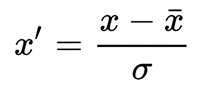

    Aquí, σ es la desviación estándar del vector de características y x̄ es el promedio del vector de características.

+ El objetivo de este método es escalar los componentes de un vector de características de modo que el vector completo tenga una longitud de uno. Esto generalmente significa dividir cada componente por la longitud euclidiana del vector:

    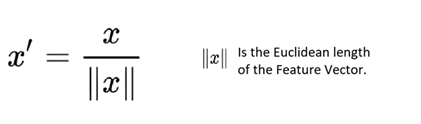

+ Hay algunos otros métodos para escalar las características:

        + Transformador de potencia 
        + Transformador cuantil
        + Escalador robusto

In [ ]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
df = pd.read_csv(r'C:\Users\ghernand\OneDrive - ITESO\Documentos\ProgramacionAnaliticaDatos\P2023\dataset-25346_dum_feat.csv')
df

,trt,prior,celltype,time,karno,diagtime,age,trt_2,celltype_large,celltype_smallcell,celltype_squamous,status_1,prior_10,log_time,karno_bin,age_bin
0,1,0,squamous,72,60,7,69,0,0,0,1,1,0,1.857332,"(40.0, 60.0]","(66.0, 81.0]"
1,1,10,squamous,411,70,5,64,0,0,0,1,1,1,2.613842,"(60.0, 75.0]","(62.0, 66.0]"
2,1,0,squamous,228,60,3,38,0,0,0,1,1,0,2.357935,"(40.0, 60.0]","(33.999, 51.0]"
3,1,10,squamous,126,60,9,63,0,0,0,1,1,1,2.100371,"(40.0, 60.0]","(62.0, 66.0]"
4,1,10,squamous,118,70,11,65,0,0,0,1,1,1,2.071882,"(60.0, 75.0]","(62.0, 66.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,0,large,133,75,1,65,1,1,0,0,1,0,2.123852,"(60.0, 75.0]","(62.0, 66.0]"
133,2,0,large,111,60,5,64,1,1,0,0,1,0,2.045323,"(40.0, 60.0]","(62.0, 66.0]"
134,2,10,large,231,70,18,67,1,1,0,0,1,1,2.363612,"(60.0, 75.0]","(66.0, 81.0]"
135,2,0,large,378,80,4,65,1,1,0,0,1,0,2.577492,"(75.0, 99.0]","(62.0, 66.0]"


In [ ]:
data = df.copy() # resguarda archivo cargado con todas las características

In [ ]:
df.columns

Index(['trt', 'prior', 'celltype', 'time', 'karno', 'diagtime', 'age', 'trt_2',
       'celltype_large', 'celltype_smallcell', 'celltype_squamous', 'status_1',
       'prior_10', 'log_time', 'karno_bin', 'age_bin'],
      dtype='object')

In [ ]:
# Eliminar las categóricas originales y dejar dummies en este dataset
df_dum = data.drop(['trt', 'prior', 'celltype' ], axis=1)
# quitar dummies en este dataset
df = data.drop(['trt_2','celltype_large', 'celltype_smallcell', 'celltype_squamous',
                'prior_10'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trt        137 non-null    int64  
 1   prior      137 non-null    int64  
 2   celltype   137 non-null    object 
 3   time       137 non-null    int64  
 4   karno      137 non-null    int64  
 5   diagtime   137 non-null    int64  
 6   age        137 non-null    int64  
 7   status_1   137 non-null    int64  
 8   log_time   137 non-null    float64
 9   karno_bin  137 non-null    object 
 10  age_bin    137 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 11.9+ KB


## Normalizar la columna karno

Note que no tiene outliers

<Axes: xlabel='karno'>

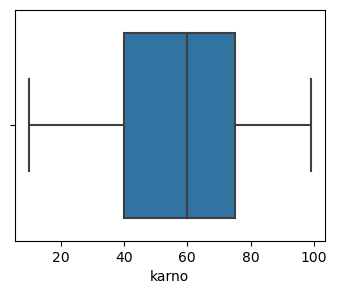

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(data=df,x='karno')


In [ ]:
# Normalizar la columna karno
X = df[['karno']].T
#X = np.array(df[['karno']]).T

# Por defecto se usa la norma l2
transformer = Normalizer().fit(X)  # fit does nothing.

transformer.transform(X)

array([[0.08284133, 0.09664821, 0.08284133, 0.08284133, 0.09664821,
        0.02761378, 0.05522755, 0.1104551 , 0.06903444, 0.09664821,
        0.08284133, 0.05522755, 0.04142066, 0.1104551 , 0.09664821,
        0.08284133, 0.08284133, 0.05522755, 0.1104551 , 0.08284133,
        0.05522755, 0.08284133, 0.08284133, 0.04142066, 0.1104551 ,
        0.04142066, 0.06903444, 0.08284133, 0.1104551 , 0.05522755,
        0.02761378, 0.1104551 , 0.04142066, 0.10355166, 0.09664821,
        0.08284133, 0.04142066, 0.08284133, 0.1104551 , 0.08284133,
        0.09664821, 0.06903444, 0.06903444, 0.05522755, 0.05522755,
        0.02761378, 0.09664821, 0.05522755, 0.1104551 , 0.1104551 ,
        0.06903444, 0.1104551 , 0.04142066, 0.1104551 , 0.06903444,
        0.1104551 , 0.06903444, 0.09664821, 0.08284133, 0.05522755,
        0.1104551 , 0.1104551 , 0.09664821, 0.12426199, 0.12426199,
        0.1104551 , 0.1104551 , 0.09664821, 0.08284133, 0.12426199,
        0.1104551 , 0.1104551 , 0.06903444, 0.06

In [ ]:
# Se emplea la norma max (máximo de los valores absolutos)
transformer = Normalizer(norm='max').fit(X)  # fit does nothing.

transformer.transform(X)

array([[0.60606061, 0.70707071, 0.60606061, 0.60606061, 0.70707071,
        0.2020202 , 0.4040404 , 0.80808081, 0.50505051, 0.70707071,
        0.60606061, 0.4040404 , 0.3030303 , 0.80808081, 0.70707071,
        0.60606061, 0.60606061, 0.4040404 , 0.80808081, 0.60606061,
        0.4040404 , 0.60606061, 0.60606061, 0.3030303 , 0.80808081,
        0.3030303 , 0.50505051, 0.60606061, 0.80808081, 0.4040404 ,
        0.2020202 , 0.80808081, 0.3030303 , 0.75757576, 0.70707071,
        0.60606061, 0.3030303 , 0.60606061, 0.80808081, 0.60606061,
        0.70707071, 0.50505051, 0.50505051, 0.4040404 , 0.4040404 ,
        0.2020202 , 0.70707071, 0.4040404 , 0.80808081, 0.80808081,
        0.50505051, 0.80808081, 0.3030303 , 0.80808081, 0.50505051,
        0.80808081, 0.50505051, 0.70707071, 0.60606061, 0.4040404 ,
        0.80808081, 0.80808081, 0.70707071, 0.90909091, 0.90909091,
        0.80808081, 0.80808081, 0.70707071, 0.60606061, 0.90909091,
        0.80808081, 0.80808081, 0.50505051, 0.50

### Normalizar con MinMaxScaler

+ Escala el conjunto de datos de modo que todos los valores de las características estén en el rango [0, 1].
+ Es muy sensible a la presencia de outliers.


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
karno,60,70,60,60,70,20,40,80,50,70,...,30,60,30,60,80,75,60,70,80,30


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(X.T)) # Transpuesta para hacer vector unidimensional (también se puede con flatten o unravel)



MinMaxScaler()


In [ ]:
print(scaler.data_max_) # Este es el dato más grande de karno que se tiene

[99.]


In [ ]:
print(scaler.transform(X.T)) # Se lleva de 0 a 1

[[0.56179775]
 [0.6741573 ]
 [0.56179775]
 [0.56179775]
 [0.6741573 ]
 [0.11235955]
 [0.33707865]
 [0.78651685]
 [0.4494382 ]
 [0.6741573 ]
 [0.56179775]
 [0.33707865]
 [0.2247191 ]
 [0.78651685]
 [0.6741573 ]
 [0.56179775]
 [0.56179775]
 [0.33707865]
 [0.78651685]
 [0.56179775]
 [0.33707865]
 [0.56179775]
 [0.56179775]
 [0.2247191 ]
 [0.78651685]
 [0.2247191 ]
 [0.4494382 ]
 [0.56179775]
 [0.78651685]
 [0.33707865]
 [0.11235955]
 [0.78651685]
 [0.2247191 ]
 [0.73033708]
 [0.6741573 ]
 [0.56179775]
 [0.2247191 ]
 [0.56179775]
 [0.78651685]
 [0.56179775]
 [0.6741573 ]
 [0.4494382 ]
 [0.4494382 ]
 [0.33707865]
 [0.33707865]
 [0.11235955]
 [0.6741573 ]
 [0.33707865]
 [0.78651685]
 [0.78651685]
 [0.4494382 ]
 [0.78651685]
 [0.2247191 ]
 [0.78651685]
 [0.4494382 ]
 [0.78651685]
 [0.4494382 ]
 [0.6741573 ]
 [0.56179775]
 [0.33707865]
 [0.78651685]
 [0.78651685]
 [0.6741573 ]
 [0.8988764 ]
 [0.8988764 ]
 [0.78651685]
 [0.78651685]
 [0.6741573 ]
 [0.56179775]
 [0.8988764 ]
 [0.78651685]
 [0.78

### Normalizar con MaxAbsScaler

+ Los valores se asignan en varios rangos dependiendo de si hay valores negativos o positivos presentes. 
    + Si solo hay valores positivos, el rango es [0, 1]. 
    + Si solo hay valores negativos, el rango es [-1, 0]. 
    + Si están presentes valores tanto negativos como positivos, el rango es [-1, 1].
    + Solo con datos positivos, tanto MinMaxScaler como MaxAbsScaler se comportan de manera similar. 

+ MaxAbsScaler también sufre la presencia de grandes valores atípicos.


In [ ]:
# Observar que produce resultados similares (no iguales) porque todos los valores de karno son positivos
from sklearn.preprocessing import MaxAbsScaler

transformer = MaxAbsScaler().fit(X.T)

transformer.transform(X.T)


array([[0.60606061],
       [0.70707071],
       [0.60606061],
       [0.60606061],
       [0.70707071],
       [0.2020202 ],
       [0.4040404 ],
       [0.80808081],
       [0.50505051],
       [0.70707071],
       [0.60606061],
       [0.4040404 ],
       [0.3030303 ],
       [0.80808081],
       [0.70707071],
       [0.60606061],
       [0.60606061],
       [0.4040404 ],
       [0.80808081],
       [0.60606061],
       [0.4040404 ],
       [0.60606061],
       [0.60606061],
       [0.3030303 ],
       [0.80808081],
       [0.3030303 ],
       [0.50505051],
       [0.60606061],
       [0.80808081],
       [0.4040404 ],
       [0.2020202 ],
       [0.80808081],
       [0.3030303 ],
       [0.75757576],
       [0.70707071],
       [0.60606061],
       [0.3030303 ],
       [0.60606061],
       [0.80808081],
       [0.60606061],
       [0.70707071],
       [0.50505051],
       [0.50505051],
       [0.4040404 ],
       [0.4040404 ],
       [0.2020202 ],
       [0.70707071],
       [0.404

## Escalamiento de la variable time

<Axes: xlabel='time', ylabel='Count'>

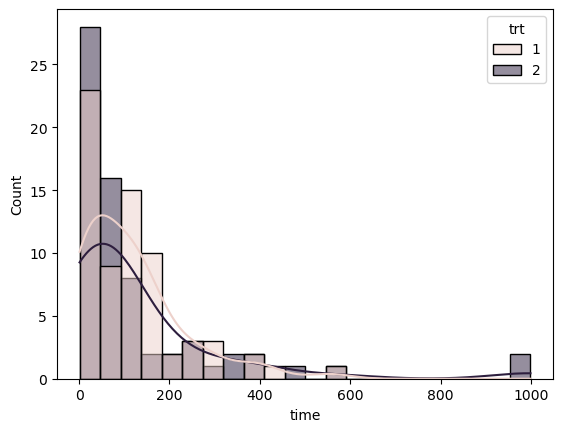

In [ ]:
sns.histplot(data=df,x='time',hue='trt',kde=True)

<Axes: xlabel='time'>

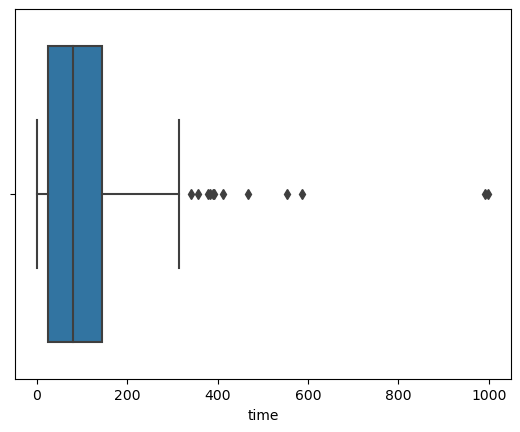

In [15]:
sns.boxplot(data=df,x='time')
sns.boxplot(data=df,y='time',x='trt')

## Hallazgos y recomendaciones

+ La variable time no sigue una distribución normal.
+ Los escaladores de potencia (PowerTransformer) son robustos ante la presencia de outliers y se recomienda su aplicación.

### Transformador de potencia Box Cox

Vamos a crear una nueva columna 'bc_time'

In [16]:
from sklearn.preprocessing import PowerTransformer

In [18]:
bc = PowerTransformer(method="box-cox")
df['bc_time'] = bc.fit_transform(df[['time']])

<Axes: xlabel='bc_time', ylabel='Count'>

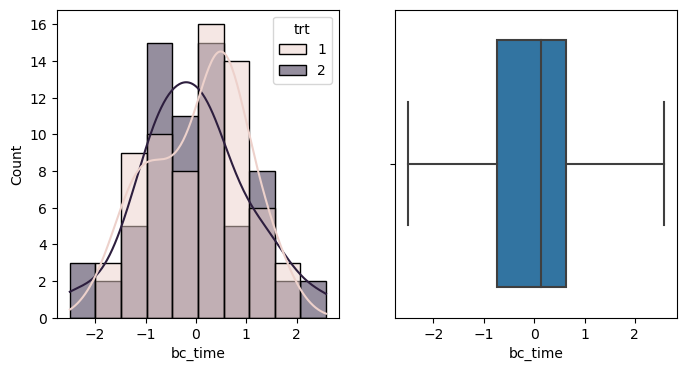

In [21]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
sns.histplot(data=df, x="bc_time", hue='trt',kde=True, ax=ax[0])
ax[1] = sns.boxplot(data=df,y='bc_time',x='trt')

In [24]:
sm.qqplot?

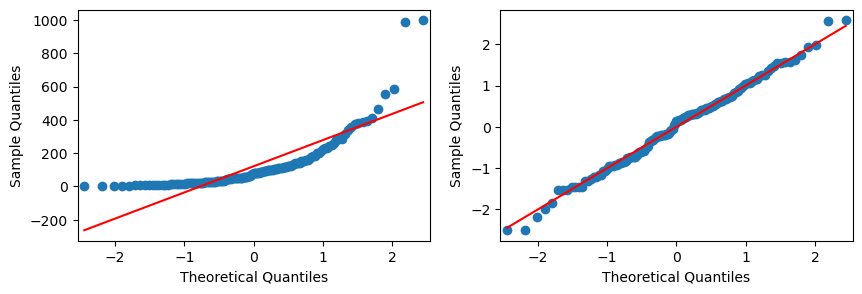

In [30]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
a = sm.qqplot(df.time, line='s',ax=ax[0])
b = sm.qqplot(df.bc_time, line='s',ax=ax[1])
plt.show()

In [32]:
# Prueba de Shapiro-Wilk de normalidad
#La hipótesis nula es que la muestra sigue distribución normal
from scipy.stats import shapiro 
shapiro(df.bc_time)

ShapiroResult(statistic=0.9941854476928711, pvalue=0.8546182513237)

### Hallazgo de transformación con Box Cox

Se acepta la hipótesis de normalidad de datos transformados con Box-Cox con valor p de 0.8546

### Transformador de potencia Yeo Johnson

Creamos la columna 'yj_time'

In [33]:
yj = PowerTransformer(method="yeo-johnson")
df['yj_time'] = yj.fit_transform(df[['time']])
df['yj_time'] = yj.fit_transform(df[['time']])


<Axes: xlabel='yj_time', ylabel='Count'>

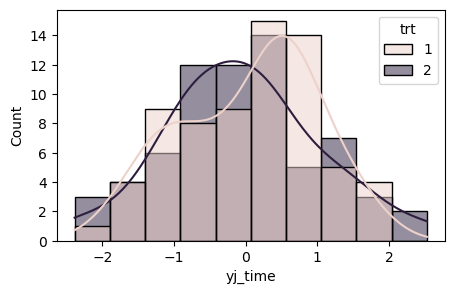

In [34]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df, x="yj_time", hue='trt',kde=True)

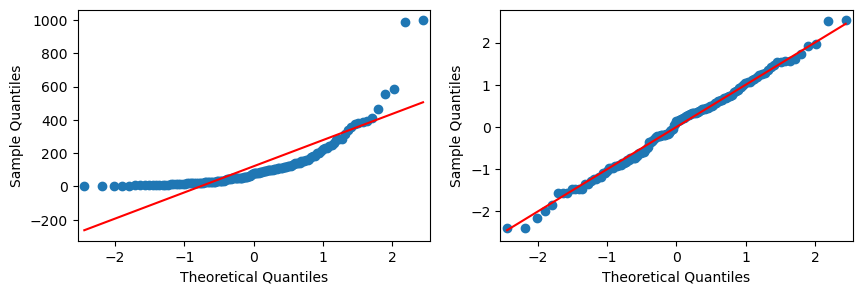

In [35]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
a = sm.qqplot(df.time, line='s',ax=ax[0])
b = sm.qqplot(df.yj_time, line='s',ax=ax[1])
plt.show()

In [36]:
shapiro(df.yj_time)

ShapiroResult(statistic=0.9932432174682617, pvalue=0.7634913921356201)

### Hallazgo de transformación con Yeo Johnson

Se acepta la hipótesis de normalidad de datos transformados con Yeo Johnson

### Transformación de cuantil

Creamos la columna 'qt_time'

In [37]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [38]:
qt = QuantileTransformer(n_quantiles=500, output_distribution="normal", random_state=42)
df['qt_time'] = qt.fit_transform(df[['time']])
df['qt_time'] = qt.fit_transform(df[['time']])

C:\Users\ghernand\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (500) is greater than the total number of samples (137). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\ghernand\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (500) is greater than the total number of samples (137). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: xlabel='qt_time', ylabel='Count'>

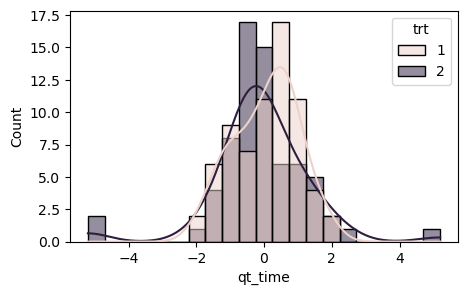

In [39]:
fig,ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df, x="qt_time", hue='trt',kde=True)

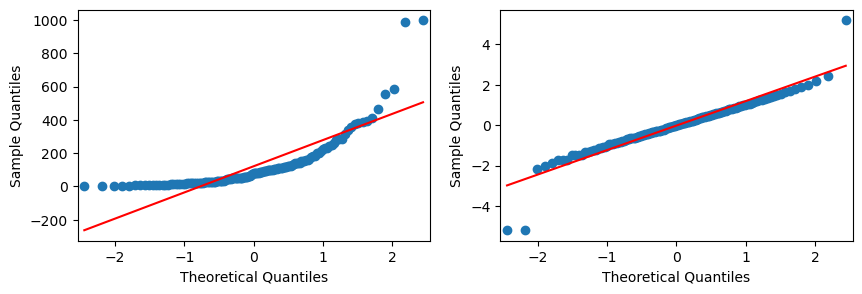

In [40]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
a = sm.qqplot(df.time, line='s',ax=ax[0])
b = sm.qqplot(df.qt_time, line='s',ax=ax[1])
plt.show()

In [41]:
shapiro(df.qt_time)

ShapiroResult(statistic=0.9202603101730347, pvalue=6.129772032181791e-07)

## Hallazgo de transformación de quantil

+ Se rechaza la hipótesis de normalidad de datos transformados con transformación de cuantil
+ No es robusta frente a outliers como Box Cox y Yeo Johnson